In [248]:
import pandas as pd
data = pd.read_csv('C:/Users/97254/Desktop/matala_2/matala2_cosmetics_2019-Nov.csv')
data.head()

c:\users\97254\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


In [249]:
##1
from datetime import datetime
data['event_time'] = pd.to_datetime(data['event_time']) # המרת העמודה לפורמט של זמן
data['next_event_time'] = data.groupby('user_id')['event_time'].shift(-1) # יצירת עמודה עם זמן האירוע הבא בביקור
data['duration_to_next_event'] = (data['next_event_time'] - data['event_time']).dt.total_seconds() # חישוב הזמן בשניות לאירוע הבא בביקור
data['duration_to_next_event'].fillna(0, inplace=True) # מילוי ערכים חסרים ב-0
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,2019-11-01 00:00:25,23.0
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24,15.0
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,2019-11-01 00:00:55,45.0
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,2019-11-01 00:01:54,103.0
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,2019-11-01 00:00:24,0.0


In [250]:
##2
import numpy as np
from datetime import datetime
data['event_time'] = pd.to_datetime(data['event_time']) # המרת העמודה לפורמט של זמן
data.sort_values(by=['user_id', 'event_time'], inplace=True) # מיון הדאטה 
data['days_diff'] = data.groupby('user_id')['event_time'].diff().dt.days # חישוב הפרשי הזמן בימים בין ביקור לביקור אחריו
data['funnel_number'] = np.where(data['days_diff'].fillna(0) > 5, 1, 0) # אם הפרש הימים גדול מ5- 1. אם קטן מ5- 0
data['funnel_number'] = data.groupby('user_id')['funnel_number'].cumsum() + 1 # אם הפרש הימים גדול מ5- הוספת 1 לערך בעמודה
data.drop('days_diff', axis=1, inplace=True) #הוספת העמודה לדאטה
data.head(10)
#data.iloc[np.where(data['funnel_number']>1)]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event,funnel_number
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaT,0.0,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26,52.0,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,124.0,1
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,0.0,1
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,NaT,0.0,1
331383,2019-11-03 18:53:34,view,5713294,1487580008070250000,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,2019-11-03 18:55:01,87.0,1
331546,2019-11-03 18:55:01,view,5713295,1487580008070250000,appliances.personal.hair_cutter,NaN,46.02,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,2019-11-03 18:55:47,46.0,1
331614,2019-11-03 18:55:47,view,5713294,1487580008070250000,appliances.personal.hair_cutter,NaN,57.14,10521214,25d2d492-d688-4baa-adf1-7296dbdd663e,NaT,0.0,1
462864,2019-11-04 18:22:21,cart,5809910,1602943681873050000,NaN,grattol,5.24,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,2019-11-04 18:22:41,20.0,1
462917,2019-11-04 18:22:41,view,5899834,2115334439910240000,NaN,NaN,3.97,11274156,0c778a88-4700-4e8b-becb-3371ec28ea79,2019-11-04 18:24:17,96.0,1


In [262]:
##3
data['index_in_funnel'] = data.groupby(['user_session','user_id', 'funnel_number']).cumcount() + 1 # הוספת 1 על כל ביקור בתוך הפאנל
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaT,0.0,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26,52.0,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,124.0,1,2
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,0.0,1,3
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,NaT,0.0,1,4


In [261]:
data[['user_id','user_session','event_time','event_type','funnel_number','index_in_funnel']][data['user_id'] == 566721094].head(40)

,user_id,user_session,event_time,event_type,funnel_number,index_in_funnel
144607,566721094,ab702d68-bb0b-4186-adc9-e7be8f411816,2019-11-02 09:17:23,view,1,1
145064,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:37,view,1,1
145069,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:39,cart,1,2
145071,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:42,cart,1,3
145075,566721094,bfa67c6f-a698-4bb8-8d99-db55b27e1c8b,2019-11-02 09:22:44,remove_from_cart,1,4
1032764,566721094,db146d70-de97-4a80-b042-4da29f03cd46,2019-11-08 09:42:19,view,2,1
1036737,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:05:55,view,2,1
1036946,566721094,5c6d95df-b5b3-4b4c-8e4e-5b05d42cf92f,2019-11-08 10:07:03,view,2,2
1037963,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:28,view,2,1
1038013,566721094,fa9b7b00-3541-4470-869b-822c8eae0244,2019-11-08 10:13:51,view,2,2


In [244]:
##4
import pandas as pd
import re
data_with_letters = data[data['price'].str.contains(r'[^\d.]', na=False)]
data_with_letters['price'] = data_with_letters['price'].str.extract(r'(\d+\.?\d*)', expand=False)
data.update(data_with_letters)
data['price'] = data['price'].astype(float)
data.head()

C:\Users\97254\AppData\Local\Temp/ipykernel_28532/1065373865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_letters['price'] = data_with_letters['price'].str.extract(r'(\d+\.?\d*)', expand=False)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,next_event_time,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240.0,1.487580e+18,NaN,runail,4.05,1120748.0,d0484d94-7ac1-44e8-a310-2360da11ad9d,NaT,0.0,1.0,1.0
697519,2019-11-06 10:40:34,cart,5614842.0,1.487580e+18,NaN,cnd,13.56,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:41:26,52.0,1.0,1.0
697645,2019-11-06 10:41:26,cart,5766379.0,1.783999e+18,NaN,kaaral,12.25,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,124.0,1.0,2.0
698043,2019-11-06 10:43:30,purchase,5766379.0,1.783999e+18,NaN,kaaral,12.25,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,2019-11-06 10:43:30,0.0,1.0,3.0
698045,2019-11-06 10:43:30,purchase,5614842.0,1.487580e+18,NaN,cnd,13.56,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,NaT,0.0,1.0,4.0


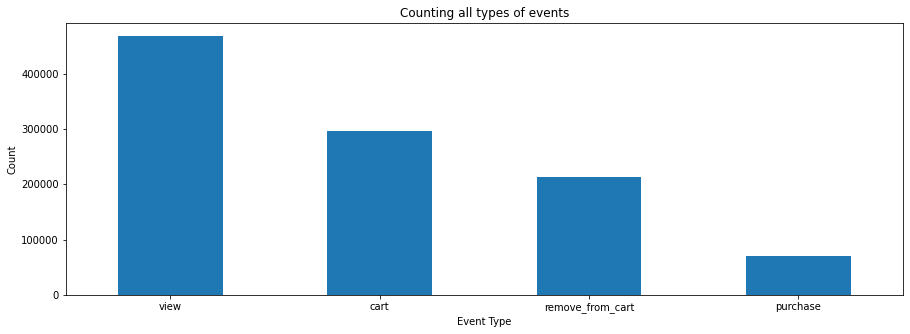

In [208]:
##5
import matplotlib.pyplot as plt
event_types = data['event_type'].value_counts()
event_counts = data['event_type'].value_counts()
event_counts.plot(kind='bar', figsize=(15, 5), rot=0)
plt.title('Counting all types of events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [245]:
##6
import pandas as pd
data.sort_values(by=['event_time'],inplace = True)
data['list_of_view'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'view' else None, axis=1)
data['list_of_added_to_cart'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'cart' else None, axis=1)
data['list_of_purchased'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'purchase' else None, axis=1)
data['events_per_visit'] = data.groupby(['user_id', 'user_session'])['event_type'].transform('count')
session_duration = data[['user_session', 'duration_to_next_event']].groupby('user_session').sum()
session_duration = session_duration.rename(columns={'duration_to_next_event': 'session_duration'})
data = data.merge(session_duration, on='user_session', how='left')


new_df = data.groupby(['user_id', 'user_session','funnel_number','index_in_funnel','events_per_visit','session_duration']).agg({
    'list_of_view': lambda x: list(x.dropna()),
    'list_of_added_to_cart': lambda x: list(x.dropna()),
    'list_of_purchased': lambda x: list(x.dropna()),   
}).reset_index()

In [247]:
new_df.head()

,user_id,user_session,funnel_number,index_in_funnel,events_per_visit,session_duration,list_of_view,list_of_added_to_cart,list_of_purchased
0,1120748.0,d0484d94-7ac1-44e8-a310-2360da11ad9d,1.0,1.0,1.0,0.0,[5240.0],[],[]
1,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,1.0,1.0,4.0,176.0,[],[5614842.0],[]
2,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,1.0,2.0,4.0,176.0,[],[5766379.0],[]
3,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,1.0,3.0,4.0,176.0,[],[],[5766379.0]
4,10079204.0,f873d16b-4efa-4e92-81be-92948aef2ff5,1.0,4.0,4.0,176.0,[],[],[5614842.0]
